In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

from mpl_toolkits.mplot3d import Axes3D

In [5]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

In [22]:
np.max(y)-np.min(y)

45.0

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
class GBDT():
    def __init__(self, n_estimators=100, max_depth=3, alpha=1.0):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.alpha = alpha

    def fit(self, X, y):
        self.trees = {}      
        r = y
        
        for i in np.arange(1, self.n_estimators):
            self.trees[i] = DecisionTreeRegressor(max_depth=self.max_depth)
            self.trees[i].fit(X, r)
            s_update = self.trees[i].predict(X)
            r -= s_update
            
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        
        for i in self.trees.keys():
            s_update = self.trees[i].predict(X)
            y_pred += self.alpha * s_update
            
        return y_pred

In [27]:
GBDT_model = GBDT()
GBDT_model.fit(X_train, y_train)
y_pred = GBDT_model.predict(X_test)

In [28]:
mean_squared_error(y_test, y_pred)

19.166367201401744

In [29]:
mean_squared_error(y_train, GBDT_model.predict(X_train))

559.9638113248573

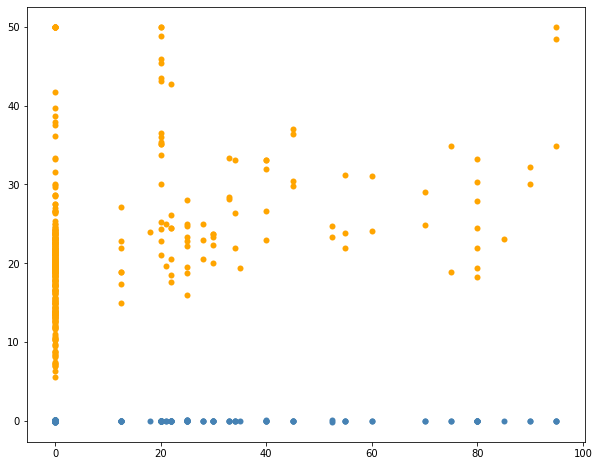

In [31]:
plt.subplots(figsize=(10,8))
plt.scatter(X_train[:,1], y_train, linewidths=0.01, color='steelblue')
plt.scatter(X_train[:,1], GBDT_model.predict(X_train), linewidths=0.01, color='orange')

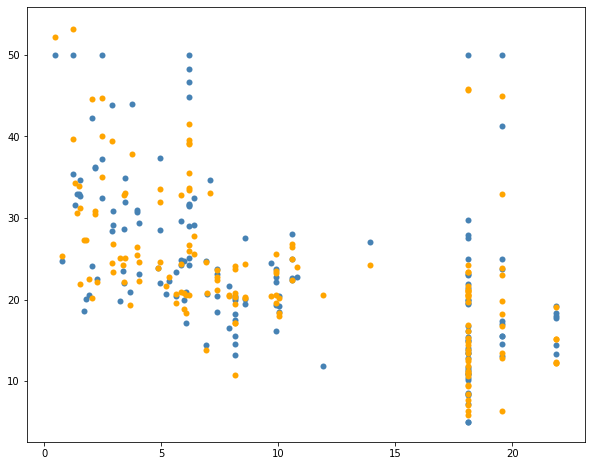

In [19]:
plt.subplots(figsize=(10,8))
plt.scatter(X_test[:,2], y_test, linewidths=0.01, color='steelblue')
plt.scatter(X_test[:,2], y_pred, linewidths=0.01, color='orange')

In [16]:
X_test.shape

(152, 13)